# Machine Learning LAB 1: MODEL SELECTION

Course 2024/25: *F. Chiariotti*

The notebook contains a simple learning task over which we will implement **MODEL SELECTION AND VALIDATION**.

Complete all the **required code sections** and **answer all the questions**.

### IMPORTANT for the exam:

The functions you might be required to implement in the exam will have the same signature and parameters as the ones in the labs

## Polynomial Classification on Signal to Noise Ratios

In this notebook we are going to explore the use of polynomial classification with polynomial regression. We are going to use the Numpy **polyfit** function, which performs polynomial regression.

Our use case is a communication problem: we have a set of measurements of the Signal to Noise Ratio (SNR), i.e., the quality of the communication link, in various positions. The SNR depends on two components: firstly, the noise level (which is a random variable that does not depend on position) and the signal attenuation (usually modeled as a polynomial function of the distance).

Our transmitter is in (0,0), and coordinates are in meters. In urban scenarios, the attenuation usually follows a third-degree polynomial, but it might be a fourth- or fifth-degree polynomial in more complex cases. How do we choose between different degrees? We will try with a maximum of **6**

---

## Import all the necessary Python libraries

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import itertools
from matplotlib import pyplot as plt

---

## Load the data

In this case, x and y are the two coordinates, and the SNR is the thing we are trying to predict

**DO NOT CHANGE THE PRE-WRITTEN CODE UNLESS OTHERWISE SPECIFIED**

In [42]:
df = pd.read_csv('data/snr_measurements.csv',sep=';')
x = df['x'].to_numpy()
y = df['y'].to_numpy()
SNR = df['SNR'].to_numpy()

In [ ]:
testList = [1, 2, 3, 5]

test = np.random.randint(200)


if test not in testList:
   testList.append(test)

testList

[1, 2, 3, 5, 136]

## Helper functions

These functions will help us evaluate the results

In [151]:
def compute_distance(x, y):
    return np.sqrt(x**2 + y**2)

def fit(distance, SNR, degree):
    return np.polyfit(distance, SNR, deg=degree)

def predict(distance, poly_coeffs):
    SNR  = 0
    for i in range(1, len(poly_coeffs) + 1):
        SNR += poly_coeffs[-i]*distance**(i-1)
    return SNR

def evaluate(distance, SNR, poly_coeffs):

    mse = 0
    for i in range(len(SNR)):
        mse += (SNR[i] - predict(distance[i], poly_coeffs))**2

    mse = 1/len(SNR)*mse
    return mse

def separate_test(x, y):
    # TODO: Return a training set and a test set (the test_points parameter controls the number of test points).
    # The points should be selected randomly

    RandomArchive = []
    x_train, y_train = [], []
    x_test, y_test = [], []

    while len(RandomArchive) != int(len(x)*3/4):
        RandNum = np.random.randint(len(x))

        if RandNum not in RandomArchive:
            RandomArchive.append(RandNum)

            x_train.append(x[RandNum])
            y_train.append(y[RandNum])

    
    for i in range(len(x)):
        if i not in RandomArchive:
            x_test.append(x[i])
            y_test.append(y[i])
    
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

In [152]:
distance = compute_distance(x, y)
x_train, y_train, x_test, y_test = separate_test(x, y )

distance_train = compute_distance(x_train, y_train)
distance_test = compute_distance(x_test, y_test)


poly_coeff = fit(distance, SNR, 5)
print(poly_coeff)

SNRpred_train = predict(distance_train, poly_coeff)
SNRpred_test = predict(distance_test, poly_coeff)
mse_train = evaluate(distance_train, SNR, poly_coeff)

[-1.94909700e-09  6.14927473e-07 -7.20139497e-05  3.22048697e-03
 -6.49799580e-02  1.04031284e+01]


IndexError: index 150 is out of bounds for axis 0 with size 150

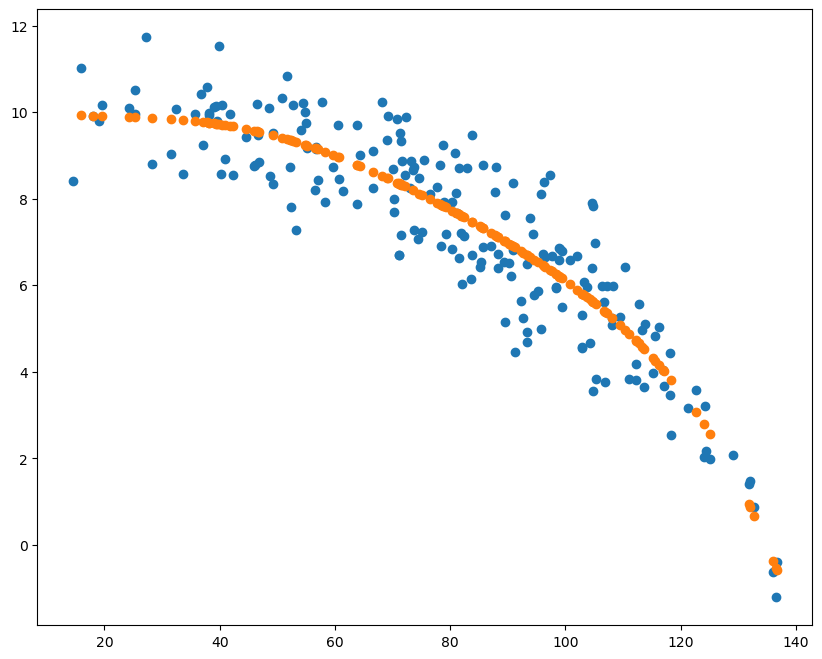

In [153]:
fig, axs = plt.subplots(1, figsize = (10, 8))

ax = axs

ax.scatter(distance, SNR)
#ax.errorbar(distance_train, SNRpred_train, mse_train, fmt='o', color = 'red')
ax.scatter(distance_train, SNRpred_train)


## A. K-fold cross-validation

In this case, x and y are the two coordinates, and the SNR is the thing we are trying to predict

In [ ]:
# Function to perform the K-fold cross validation
def k_fold_cross_validation(x_train: np.ndarray, y_train: np.ndarray, k: int, max_degree: int) -> tuple[tuple, tuple]:
    # TODO: Perform K-fold cross-validation on the training set.
    # The two returned values are the best model and the list of results for all degrees up to max_degree.
    # The points should be selected randomly.
    # The inputs and labels are already in terms of distance and SNR
    return best, results

In [ ]:
# TODO: run the training with K-fold cross-validation with 40 test points and 4 folds Plot the validation score as a function of the degree

In [ ]:
# TODO: get the test performance of the best model and plot the model output and test points. 
# Try running the program multiple times, changing the values of K and the number of test points: is the output always the same?

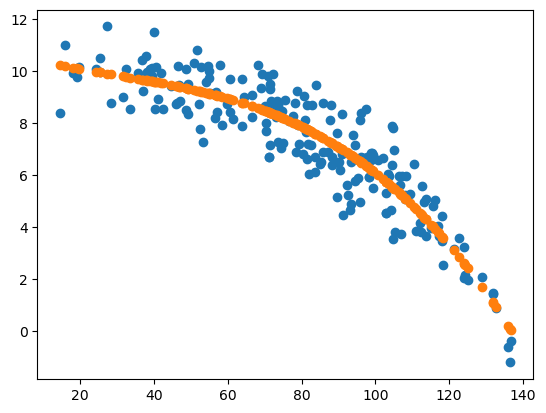

---

## B. Tikhonov regularization

Change the loss function to include a Tikhonov regularization term, as an alternative to cross-validation (try $\lambda=1$) or best $\lambda$ = 0.1 or 0.01

In [ ]:
def evaluate_tikhonov(x_train: np.ndarray, y_train: np.ndarray, lambda_par: float, max_degree: int) -> tuple[tuple, tuple]:
    # TODO: apply Tikhonov regularization AFTER the fitting process

    return best, results

In [ ]:
# TODO: run the training with Tikhonov regularization and plot the loss as a function of the degree


## C. Minimum description length regularization

Change the loss function to include a representation length regularization term, as an alternative to cross-validation. The minimum description length of a polynomial of degree N is O(2^N) - try $\lambda=1$

In [ ]:
def evaluate_representation(x_train: np.ndarray, y_train: np.ndarray, lambda_par: float, max_degree: int) -> tuple[tuple, tuple]:
    # TODO: apply Tikhonov regularization AFTER the fitting process

    return best, results

In [ ]:
# TODO: run the training with MDL regularization and plot the loss as a function of the degree

### TEST

Check the performance of the three solutions on the test set: which one does best?


In [ ]:
# TODO: plot the results